In [137]:
import numpy as np
import pandas as pd
import json
import networkx as nx
from matplotlib import pyplot as plt

In [138]:
mentions = {}

with open("mentions.json") as json_data:
    data = json.load(json_data, strict=False)
    mentions = data

In [139]:
mentions['DavChu']

['JigmeUgen',
 'officialkennyg',
 'fion_li',
 'PenguinSix',
 'chowjackie',
 'chantaimanblog',
 'UmbrellaRevHK',
 'PhilipsShiu',
 'Galileo44',
 'Galileo44',
 'vincicat',
 'chowjackie',
 'freemoren',
 'yangpigui',
 'CynicalO',
 'hnjhj',
 'vincicat',
 'Doriscafe',
 'hkdemonow',
 'Galileo44',
 'freakingcat',
 'martinoei',
 'Carmen_NgKaMan',
 'freakingcat',
 'freakingcat',
 'freakingcat',
 'iyengarrishi',
 'lamkayblog',
 'Badcanto',
 'Galileo44',
 'tyteen4a03',
 'freakingcat',
 'singsingarsing',
 'tyteen4a03',
 'manjyukatsuki',
 'Galileo44',
 'Galileo44',
 'singsingarsing',
 'benone_',
 'Ben_Chasteen',
 'Galileo44',
 'hkdemonow',
 'appledaily_hk',
 'Galileo44',
 'Galileo44',
 'yukikei',
 'freakingcat',
 'shazza_razza',
 'krislc',
 'hkdemonow',
 'vincicat',
 'freakingcat',
 'leohsu',
 'krislc',
 'saulocorona',
 'AFP',
 'desiree_fa',
 'singsingarsing',
 'STForeignDesk',
 'yplucyc',
 'hkdemonow',
 'krislc',
 'donplusn',
 'tyteen4a03',
 'tyteen4a03',
 'tyteen4a03',
 'GlobalSolidHK',
 'freakingc

In [140]:
nodes = []

f = open("nodes","r")

for i in f.readlines():
    nodes.append(i[:-1])

In [141]:
nodes

['usccrcc',
 'MariaConchita_A',
 'maheath1',
 'UME_JPN',
 'PeterTatchell',
 'dr_fat',
 'dailydot',
 'thebetsy4',
 'SCMPgraphics',
 'EvolvingMeme',
 'Clarence_hk',
 'PRHACK',
 'Newsweek_JAPAN',
 'moneylaw',
 'AShinOfficial',
 'VioletaCamarasa',
 'skpracta',
 'GraceTsoi',
 'dreistreifen',
 'globalcriterion',
 'ultimenotizie',
 'yingworld',
 'melgoh',
 'larryluk',
 'potasia',
 'MikeGJW',
 'LYurikoT',
 'McDonalds',
 'socrec',
 'GlobalFor',
 'SvD',
 'HKongNow',
 'n8fr8',
 'kona2',
 'jitenmelwani',
 'ChinaRealTime',
 'alex_bainbridge',
 'alanxavier',
 'HungerGames',
 'jackylim915',
 'MaxStranger',
 'RamyInocencio',
 'Google',
 'MeteorJobs',
 'AaronAnf',
 'KevinCureau',
 'ProSyn',
 'Professor_Daly',
 'AmandeepReports',
 'L5d',
 'diana_jou',
 'MoArtCn',
 'BanderAlMutlaq',
 'Darrell_Nelson',
 'ZhMinYH',
 'BBC_HaveYourSay',
 'Shamichael8',
 'miniyoshima',
 'weatherhk',
 'sadielau',
 'hklies',
 'dansuyume',
 'Aktualnecz',
 'maozedong',
 'lss007',
 'hu_jia',
 'cnnasiapr',
 'onedirection',
 'johnwo

In [142]:
def matrix_weight_calc(a,b):
    if(a in mentions.keys() and b in mentions.keys()):
        if(a in mentions[b]):
            if(b in mentions[a]):
                return mentions[a].count(b)+mentions[b].count(a)
            else:
                return mentions[b].count(a)
        elif(b in mentions[a]):
            if(a in mentions[b]):
                return mentions[a].count(b)+mentions[b].count(a)
            else:
                return mentions[a].count(b)
        else:
            return 0
        
        
    elif(a in mentions.keys()):
        if(b in mentions[a] ):
            return mentions[a].count(b)
        else:
            return 0
    elif(b in mentions.keys()):
        if(a in mentions[b]):
            return mentions[b].count(a)
        else:
            return 0
    else:
        return 0
    
def weightCalcWrapper(a,b):
    val1= matrix_weight_calc(a,b)
    val2= matrix_weight_calc(b,a)
    if(val1>val2):
        return val1
    else:
        return val2

In [143]:
network_matrix = []

for i in range(len(nodes)):
    network_matrix.append((nodes[i],[weightCalcWrapper(nodes[i],j) for j in nodes]))
    

In [144]:
print(nodes.index("DavChu"))

404


In [145]:
print(network_matrix[404][1].index(4))

130


In [146]:
print(network_matrix[404][1][130],network_matrix[130][1][404])

4 4


In [147]:
finalNodelListOfLists= [i[1] for i in network_matrix]

In [148]:
mat = np.matrix(finalNodelListOfLists)

In [123]:
print

<function print>

In [149]:
G = nx.from_numpy_matrix(mat)

In [150]:
mapping = {}

i = 0
for j in nodes:
    mapping[i] = j
    i += 1
    
mapping    

{0: 'usccrcc',
 1: 'MariaConchita_A',
 2: 'maheath1',
 3: 'UME_JPN',
 4: 'PeterTatchell',
 5: 'dr_fat',
 6: 'dailydot',
 7: 'thebetsy4',
 8: 'SCMPgraphics',
 9: 'EvolvingMeme',
 10: 'Clarence_hk',
 11: 'PRHACK',
 12: 'Newsweek_JAPAN',
 13: 'moneylaw',
 14: 'AShinOfficial',
 15: 'VioletaCamarasa',
 16: 'skpracta',
 17: 'GraceTsoi',
 18: 'dreistreifen',
 19: 'globalcriterion',
 20: 'ultimenotizie',
 21: 'yingworld',
 22: 'melgoh',
 23: 'larryluk',
 24: 'potasia',
 25: 'MikeGJW',
 26: 'LYurikoT',
 27: 'McDonalds',
 28: 'socrec',
 29: 'GlobalFor',
 30: 'SvD',
 31: 'HKongNow',
 32: 'n8fr8',
 33: 'kona2',
 34: 'jitenmelwani',
 35: 'ChinaRealTime',
 36: 'alex_bainbridge',
 37: 'alanxavier',
 38: 'HungerGames',
 39: 'jackylim915',
 40: 'MaxStranger',
 41: 'RamyInocencio',
 42: 'Google',
 43: 'MeteorJobs',
 44: 'AaronAnf',
 45: 'KevinCureau',
 46: 'ProSyn',
 47: 'Professor_Daly',
 48: 'AmandeepReports',
 49: 'L5d',
 50: 'diana_jou',
 51: 'MoArtCn',
 52: 'BanderAlMutlaq',
 53: 'Darrell_Nelson',


In [151]:
print(G.edges(data=True))

[(0, 21, {'weight': 1}), (1, 2574, {'weight': 1}), (2, 1140, {'weight': 1}), (3, 503, {'weight': 1}), (3, 575, {'weight': 1}), (4, 690, {'weight': 1}), (5, 1904, {'weight': 1}), (6, 96, {'weight': 1}), (7, 61, {'weight': 1}), (8, 8, {'weight': 2}), (8, 130, {'weight': 1}), (8, 276, {'weight': 1}), (8, 777, {'weight': 9}), (8, 1154, {'weight': 1}), (8, 1171, {'weight': 1}), (8, 1313, {'weight': 1}), (8, 1473, {'weight': 1}), (8, 1621, {'weight': 1}), (8, 1638, {'weight': 2}), (8, 1764, {'weight': 1}), (8, 1982, {'weight': 6}), (8, 2021, {'weight': 1}), (8, 2274, {'weight': 1}), (8, 2359, {'weight': 1}), (8, 2457, {'weight': 1}), (8, 2731, {'weight': 1}), (9, 819, {'weight': 1}), (10, 366, {'weight': 1}), (11, 1336, {'weight': 1}), (12, 452, {'weight': 1}), (13, 1905, {'weight': 1}), (14, 2674, {'weight': 1}), (15, 15, {'weight': 12}), (15, 35, {'weight': 1}), (15, 76, {'weight': 1}), (15, 77, {'weight': 1}), (15, 96, {'weight': 1}), (15, 118, {'weight': 1}), (15, 127, {'weight': 1}), (1

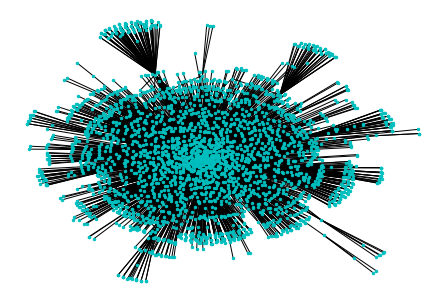

In [152]:
G.edges(data=True)

H=nx.relabel_nodes(G,mapping)


to_del = [n for n in H if H.degree(n) == 0]
H.remove_nodes_from(to_del)

pos_fr = nx.fruchterman_reingold_layout(H)

plt.figure()

nx.draw(H,pos=pos_fr,width=1, node_size=6, node_color='c', with_labels=False)
#print(H.nodes())

In [153]:
nx.write_gexf(H, "initial_network.gexf")

<h3>Analysis<h3>

In [154]:
print("Degree Centrality: ",nx.degree_centrality(H),"\n")
print("Eigen Vector Centrality: ",nx.eigenvector_centrality(H),"\n")
print("Closeness Centrality",nx.closeness_centrality(H),"\n")
print("Effective Size", nx.effective_size(H),"\n")

Degree Centrality:  {'usccrcc': 0.000357653791130186, 'MariaConchita_A': 0.000357653791130186, 'maheath1': 0.000357653791130186, 'UME_JPN': 0.000715307582260372, 'PeterTatchell': 0.000357653791130186, 'dr_fat': 0.000357653791130186, 'dailydot': 0.000357653791130186, 'thebetsy4': 0.000357653791130186, 'SCMPgraphics': 0.006437768240343348, 'EvolvingMeme': 0.000357653791130186, 'Clarence_hk': 0.000357653791130186, 'PRHACK': 0.000357653791130186, 'Newsweek_JAPAN': 0.000357653791130186, 'moneylaw': 0.000357653791130186, 'AShinOfficial': 0.000357653791130186, 'VioletaCamarasa': 0.04184549356223176, 'skpracta': 0.015021459227467811, 'GraceTsoi': 0.000357653791130186, 'dreistreifen': 0.000357653791130186, 'globalcriterion': 0.000357653791130186, 'ultimenotizie': 0.000357653791130186, 'yingworld': 0.027896995708154508, 'melgoh': 0.000357653791130186, 'larryluk': 0.000357653791130186, 'potasia': 0.000357653791130186, 'MikeGJW': 0.02646638054363376, 'LYurikoT': 0.000357653791130186, 'McDonalds': 

Closeness Centrality {'usccrcc': 0.2743058962032768, 'MariaConchita_A': 0.27111412779986427, 'maheath1': 0.2701971395438732, 'UME_JPN': 0.29342008605310105, 'PeterTatchell': 0.26807286673058484, 'dr_fat': 0.2993576017130621, 'dailydot': 0.3084730803177405, 'thebetsy4': 0.2949367088607595, 'SCMPgraphics': 0.364347146207975, 'EvolvingMeme': 0.2812877263581489, 'Clarence_hk': 0.2788749251944943, 'PRHACK': 0.2995821279331405, 'Newsweek_JAPAN': 0.2733939571721913, 'moneylaw': 0.29471908928006746, 'AShinOfficial': 0.304177545691906, 'VioletaCamarasa': 0.3869360642125657, 'skpracta': 0.3512121592764728, 'GraceTsoi': 0.28638738092799343, 'dreistreifen': 0.2788749251944943, 'globalcriterion': 0.2564196625091709, 'ultimenotizie': 0.3330157217722725, 'yingworld': 0.37793998377939986, 'melgoh': 0.2743058962032768, 'larryluk': 0.31614654002713705, 'potasia': 0.2995821279331405, 'MikeGJW': 0.38385502471169686, 'LYurikoT': 0.2780153127175102, 'McDonalds': 0.3482376385602192, 'socrec': 0.2873882207832

Effective Size {'usccrcc': -1.0, 'MariaConchita_A': 1.0, 'maheath1': 1.0, 'UME_JPN': 2.0, 'PeterTatchell': -1.0, 'dr_fat': -1.0, 'dailydot': -1.0, 'thebetsy4': -1.0, 'SCMPgraphics': 11.625, 'EvolvingMeme': -1.0, 'Clarence_hk': -1.0, 'PRHACK': 1.0, 'Newsweek_JAPAN': -1.0, 'moneylaw': 1.0, 'AShinOfficial': 1.0, 'VioletaCamarasa': 109.64347826086957, 'skpracta': 39.476190476190474, 'GraceTsoi': -1.0, 'dreistreifen': -1.0, 'globalcriterion': -1.0, 'ultimenotizie': -1.0, 'yingworld': 69.47368421052632, 'melgoh': -1.0, 'larryluk': -1.0, 'potasia': 1.0, 'MikeGJW': 65.0, 'LYurikoT': 1.0, 'McDonalds': 1.4, 'socrec': -1.0, 'GlobalFor': 1.0, 'SvD': -1.0, 'HKongNow': 1.0, 'n8fr8': 1.0, 'kona2': -1.0, 'jitenmelwani': 1.0, 'ChinaRealTime': 6.818181818181818, 'alex_bainbridge': 1.0, 'alanxavier': -1.0, 'HungerGames': 1.0, 'jackylim915': -1.0, 'MaxStranger': 6.142857142857143, 'RamyInocencio': 11.588235294117647, 'Google': 1.0, 'MeteorJobs': -1.0, 'AaronAnf': 3.5714285714285716, 'KevinCureau': 0.5, 'P

In [ ]:
edge_bet=nx.edge_betweenness_centrality(H)
x=list()
for key in edge_bet:
  x.append([key,edge_bet[key]])


x=sorted(x,key=lambda ele: ele[1],reverse=True)
print(x)

In [107]:
# nx.diameter(H)
# nx.average_shortest_path_length(H)

In [131]:
# [len(c) for c in sorted(nx.connected_components(H), key=len, reverse=True)]

In [ ]:
nx.degree_assortativity_coefficient(H)

In [160]:
for key,value in nx.degree_centrality(H).items():
    if(value>0.06):
        print(key,value)
        
#gforgonzo

GlobalForHK 0.09978540772532189
gforgonzo 0.1072961373390558
Judy_Ngao 0.06866952789699571
hlkalin 0.06044349070100143
HKfinland 0.09120171673819742
cardinc2004 0.06473533619456366
Backdoor715 0.06402002861230328
annielee789 0.07296137339055794
WatchGirlInTown 0.14163090128755365
OCLPHK 0.13733905579399142
tlng13 0.07868383404864092
BelindaChow 0.08977110157367668


<h4>Ego Graph</h4>

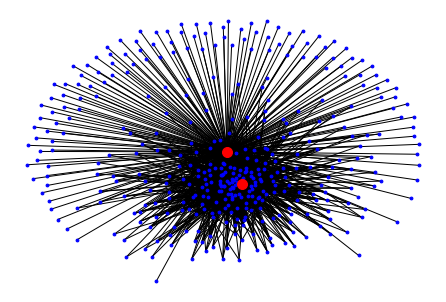

In [162]:
hub_ego = nx.ego_graph(H, "WatchGirlInTown")

# Draw graph
pos = nx.spring_layout(hub_ego)
nx.draw(hub_ego, pos, node_color='b', node_size=8, with_labels=False)
# Draw ego as large and red
nx.draw_networkx_nodes(hub_ego, pos, nodelist=["WatchGirlInTown","gforgonzo"], node_size=100, node_color='r')
plt.show(hub_ego)